<a href="https://colab.research.google.com/github/skywalker0803r/ruby_research/blob/main/crypto/BTCUSDT(%E8%B6%85%E7%B4%9A%E8%B6%A8%E5%8B%A2%E7%AD%96%E7%95%A5%E7%9F%AD%E6%9C%9F%E8%BF%BD%E6%BC%B2%E5%9B%9E%E6%B8%AC%E5%88%86%E6%9E%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 設定

In [9]:
!pip install finlab_crypto > log.txt
!pip install pandas-ta > log.txt
!pip install talib-binary > log.txt

In [10]:
import finlab_crypto
finlab_crypto.setup()

In [102]:
from binance.client import Client

api_key = 'aJOD1H8jl0396wDSo0k4PnZftjGWHQEDLoCh4T2OhbgljMBoAi8PTMRIPhsxHpDh'
api_secret = 'VpdtNdN9j1ZnTu55NzmVGeffam0yZzoGAEs83gLct5y0WnEDH2y7C2Ptkkv0cuj0'
pair = 'BTCUSDT'
freq = '15m'
nbars = 100000
client = Client(api_key,api_secret)

# 載入歷史價格資料

In [103]:
ohlcv = finlab_crypto.crawler.get_nbars_binance(pair,freq,nbars,client)
ohlcv.tail()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,,
2021-01-20 13:15:00+00:00,1.611148e+12,34404.87,34614.21,34210.00,34464.92,913.687308,1.611149e+12,3.141392e+07,27401.0,414.182033,1.424271e+07,0.0
2021-01-20 13:30:00+00:00,1.611149e+12,34464.93,34800.00,34430.30,34755.43,977.033442,1.611150e+12,3.385478e+07,26703.0,561.236872,1.945456e+07,0.0
2021-01-20 13:45:00+00:00,1.611150e+12,34749.46,34983.77,34749.46,34958.56,1016.472434,1.611151e+12,3.547536e+07,26023.0,501.219767,1.749317e+07,0.0
2021-01-20 14:00:00+00:00,1.611151e+12,34958.56,35095.86,34836.72,34901.99,1126.119250,1.611152e+12,3.940387e+07,27494.0,484.711541,1.695954e+07,0.0
2021-01-20 14:15:00+00:00,1.611152e+12,34902.85,34936.13,34900.17,34923.51,83.800862,1.611153e+12,2.925880e+06,1935.0,38.860629,1.356813e+06,0.0


# 超級趨勢指標

In [26]:
from pandas_ta.overlap.supertrend import supertrend
supertrend(ohlcv['high'],ohlcv['low'],ohlcv['close'],length=3,multiplier=1)

,SUPERT_3_1.0,SUPERTd_3_1.0,SUPERTl_3_1.0,SUPERTs_3_1.0
timestamp,,,,
2020-10-07 00:00:00+00:00,0.000000,1,NaN,NaN
2020-10-07 00:15:00+00:00,10568.963000,1,10568.963000,NaN
2020-10-07 00:30:00+00:00,10568.963000,1,10568.963000,NaN
2020-10-07 00:45:00+00:00,10568.963000,1,10568.963000,NaN
2020-10-07 01:00:00+00:00,10568.963000,1,10568.963000,NaN
...,...,...,...,...
2021-01-20 12:00:00+00:00,34665.898962,-1,NaN,34665.898962
2021-01-20 12:15:00+00:00,34122.280390,1,34122.280390,NaN
2021-01-20 12:30:00+00:00,34304.875260,1,34304.875260,NaN


In [104]:
import numbers
import talib
from finlab_crypto import Strategy

fastperiod=12
slowperiod=26
signalperiod=9

f1=1
n1=3

f2=3
n2=10

def crossover(s1, s2):
  if isinstance(s2, numbers.Number):
    return (s1 > s2) & (s1.shift() < s2)
  return (s1 > s2) & (s1.shift() < s2.shift())

def crossunder(s1, s2):
  if isinstance(s2, numbers.Number):
    return (s1 < s2) & (s1.shift() > s2) 
  return (s1 < s2) & (s1.shift() > s2.shift())


SuperTrend1 = supertrend(ohlcv['high'],ohlcv['low'],ohlcv['close'],length=n1,multiplier=f1)['SUPERT_{}_{}.0'.format(n1,f1)]
SuperTrend2 = supertrend(ohlcv['high'],ohlcv['low'],ohlcv['close'],length=n2,multiplier=f2)['SUPERT_{}_{}.0'.format(n2,f2)]
    
macdhist = talib.MACD(ohlcv.close,
        fastperiod=fastperiod, 
        slowperiod=slowperiod, 
        signalperiod=signalperiod)[2]

close = ohlcv.close
entries = crossover(macdhist, 0) & (close > SuperTrend2) & (close.shift() < SuperTrend2.shift() )
exits = crossunder(macdhist, 0) & (close < SuperTrend2) & (close.shift() > SuperTrend2.shift() )

ohlcv['entries'] = entries
ohlcv['exits'] = exits

[0.9436160298229357, -0.19537169170111834, 0.18845997716792073, -0.2215384615384619, -0.2154313792035012, 0.23271889400922063, -0.23505483667035643, 1.2269938650306678, 0.2501888709910638, -0.27059055573757096, 0.4378723826471198, 0.038042543979743826, -0.49815516212062816, -0.06286261618219102, 0.3503680464341796, -0.16510797407612854, -0.11164124695097755, 1.1463458519727299, -0.18463869206368777, 0.5423762626223239, 0.07181467181467394, -0.32592450036550424, 0.27417320323033234, 0.8373778064012738, 0.5819344270116877, -1.080671519375076, -0.0007704089022286809, -0.24177139437462358, 0.21734395346613145, -0.16265824743862956, 0.44460176991150124, 0.024468085106388315, 0.06644927406092016, 0.9837230250054008, -0.05950271254756556, 1.3151865224028336, -1.5009272804764273, 0.05839416058395219, -0.04116288213900088, 0.9026294449067329, -0.05690376569037481, -0.000848620284854551, -0.31018230145180015, -0.1110419049174971, -0.2747403020402883, 0.17983996427470839, -0.10610673179690666, -0

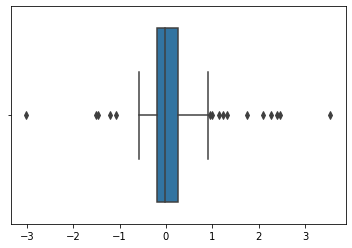

In [105]:
import datetime
import seaborn as sb
import numpy as np

plst = []

for buy_index in ohlcv[ohlcv.entries==True].index:
  sell_index = buy_index + datetime.timedelta(minutes=30)
  profit = ((ohlcv.loc[sell_index,'close']/ohlcv.loc[buy_index,'close']) - 1) * 100
  plst.append(profit)

print(plst)
print(np.mean(plst))
print(np.max(plst))
print(np.min(plst))
sb.boxplot(plst)

In [109]:
win_p = np.count_nonzero(np.clip(plst,0,np.inf))/len(plst)
win_p

0.45535714285714285

In [110]:
win_p*np.mean(plst)

0.05300843466117422